## Libraries

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import copy

pd.set_option('display.max_columns', None) # Displays all columns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function for previews

def view(df,n):
    with pd.option_context('display.max_rows',n*2):
        display(df)

## Vehicles in Crashes

https://data.ny.gov/Transportation/Motor-Vehicle-Crashes-Vehicle-Information-Three-Ye/xe9x-a24f

#### Preview

In [3]:
veh = pd.read_csv('Motor_Vehicle_Crashes_-_Vehicle_Information__Three_Year_Window.csv')
veh = veh[veh['Year']==2016]
view(veh,3)

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2016,13364180,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,East,Gas,2015.0,NY,2.0,4.0,NISSA,HUMAN,Fell Asleep,HUMAN,Unknown,Not Applicable,KNMAT2MV1FP544486
1,2016,13364181,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Merging,Not Entered,South,Gas,2007.0,NY,1.0,4.0,HYUND,HUMAN,Alcohol Involvement,HUMAN,Not Applicable,Not Entered,5NPET46C87H227617
2,2016,13364182,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,South,Gas,2009.0,NY,1.0,4.0,HONDA,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Entered,1HGCP26379A133398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560604,2016,14867165,SUBURBAN,PASSENGER OR SUBURBAN,Stopped in Traffic,Not Entered,South,Gas,2014.0,NY,2.0,4.0,FORD,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,1FMCU9GX3EUA49584
560605,2016,14869240,UNKNOWN VEHICLE,Not Entered,Unknown,Not Entered,Unknown,Not Entered,NaN,NaN,NaN,NaN,NaN,HUMAN,Not Entered,HUMAN,Not Entered,Not Entered,NaN
560606,2016,14869334,UNKNOWN VEHICLE,Not Entered,Going Straight Ahead,Not Entered,East,Not Entered,NaN,NY,1.0,NaN,NaN,HUMAN,Not Entered,HUMAN,Not Entered,"Overturned, Non-Collision",NaN


#### Column Descriptions

From the Data Dictionary for NYS Crash Vehicle Dataset

* **Year:** Calendar year of incident.
* **Case Vehicle ID:** ID assigned to the vehicle in the crash case. This is strictly a database key and not an identifier such as a VIN.
* **Vehicle Body Type:** Type of vehicle.
* **Registration Class:** Type of registration class assigned to vehicle.
* **Action Prior to Accident:** Action of vehicle just prior to crash, if known and applicable.
* **Type / Axles of Truck or Bus:** Vehicle type and number of axles for truck or bus, if known and applicable.
* **Direction of Travel:** Direction the vehicle was traveling at time of crash, if known and applicable.
* **Fuel Type:** Type of fuel vehicles uses.
* **Vehicle Year:** Manufacturer’s model year of vehicle.
* **State of Registration:** State in which the vehicle was registered.
* **Number of Occupants:** Number of occupants in vehicle at time of crash.
* **Engine Cylinders:** Number of cylinders the vehicle has.
* **Vehicle Make:** Make of vehicle.
* **Contributing Factor 1:** Category of contributing factor. Possible entries are:
    * ENVMT – Environment
    * HUMAN
    * VEHICLE
    * N/A – Not Applicable
* **Contributing Factor 1 Description:** Description of first, listed factor contributing to the crash. IMPORTANT: Do not assume that the number of times the police note "alcohol involvement" or "unsafe speed" as apparent contributing factors is the number of alcohol-related or speed-related crashes that occurred in the state. It is only the number of times it was noted on the report.
* **Contributing Factor 2:** See Contributing Factor 1.
* **Contributing Factor 2 Description:** Description of second, listed factor contributing to the crash.
* **Event Type:** Description of event that occurred
* **Partial VIN:** Left 11 positions of the Vehicle Identification Number

#### Info

In [4]:
veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560607 entries, 0 to 560606
Data columns (total 19 columns):
Year                                 560607 non-null int64
Case Vehicle ID                      560607 non-null int64
Vehicle Body Type                    560607 non-null object
Registration Class                   560607 non-null object
Action Prior to Accident             560607 non-null object
Type / Axles of Truck or Bus         560607 non-null object
Direction of Travel                  560607 non-null object
Fuel Type                            560607 non-null object
Vehicle Year                         473082 non-null float64
State of Registration                515012 non-null object
Number of Occupants                  510656 non-null float64
Engine Cylinders                     442430 non-null float64
Vehicle Make                         473601 non-null object
Contributing Factor 1                560602 non-null object
Contributing Factor 1 Description    560602 non-

#### Describe

In [5]:
veh.describe()

,Year,Case Vehicle ID,Vehicle Year,Number of Occupants,Engine Cylinders
count,560607.0,5.606070e+05,473082.000000,510656.000000,442430.000000
mean,2016.0,1.387770e+07,2008.711665,1.358372,5.248559
std,0.0,2.664452e+05,5.785466,1.909753,1.445081
min,2016.0,1.336418e+07,1900.000000,0.000000,0.000000
25%,2016.0,1.366128e+07,2005.000000,1.000000,4.000000
50%,2016.0,1.387789e+07,2010.000000,1.000000,6.000000
75%,2016.0,1.410165e+07,2014.000000,1.000000,6.000000
max,2016.0,1.486933e+07,2017.000000,881.000000,12.000000


#### Column Values

YEAR



2016    560607
Name: Year, dtype: int64

None


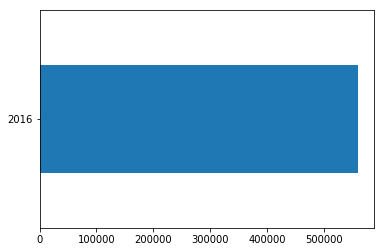


**************************************************

CASE VEHICLE ID



13364180    1
13364181    1
13364182    1
13364283    1
13364291    1
           ..
14867087    1
14867164    1
14867165    1
14869240    1
14869334    1
Name: Case Vehicle ID, Length: 560607, dtype: int64

None


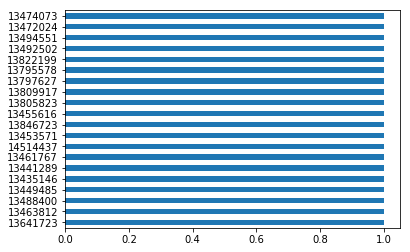


**************************************************

VEHICLE BODY TYPE



2 DOOR SEDAN            20376
4 DOOR SEDAN           218569
ALL TERRAIN VEHICLE        69
AMBULANCE                 245
BICYCLIST                6320
                        ...  
UNKNOWN VEHICLE         30796
UTILITY                  1278
VAN TRUCK                9847
WELL DRILLER                1
WELL SERVICING RIG          1
Name: Vehicle Body Type, Length: 63, dtype: int64

None


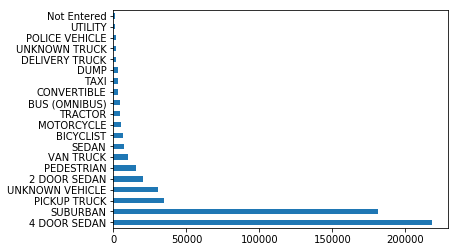


**************************************************

REGISTRATION CLASS



AGRICULTURAL COMMERCIAL      171
AGRICULTURAL TRUCK         10875
AIR NATIONAL GUARD            10
ALL TERRAIN VEHICLE           13
AMBULANCE                    267
                           ...  
TRACTOR - REGULAR            517
TRANSPORTER                   35
U.S. CONGRESS                  1
VAN POOL                       2
VAS VOLUNTEER AMBULANCE       47
Name: Registration Class, Length: 62, dtype: int64

None


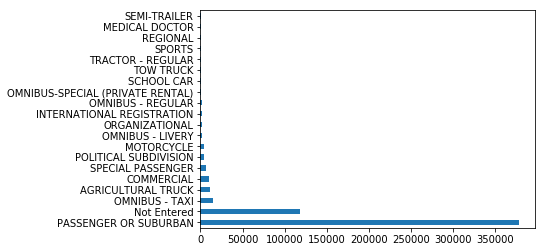


**************************************************

ACTION PRIOR TO ACCIDENT



Avoiding Object in Roadway      1751
Backing                        16289
Changing Lanes                 12728
Entering Parked Position        2440
Going Straight Ahead          264234
                               ...  
Slowing or Stopping            40469
Starting from Parking           3559
Starting in Traffic             7834
Stopped in Traffic             45335
Unknown                        36098
Name: Action Prior to Accident, Length: 22, dtype: int64

None


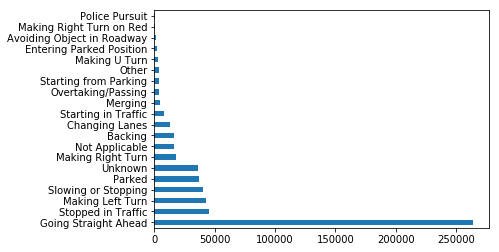


**************************************************

TYPE / AXLES OF TRUCK OR BUS



1 axle box trailer and 2 axle tractor              3
1 axle tank trailer and 2 axle tractor             1
2 axle box trailer and 2 axle tractor              1
2 axle box trailer and 3 axle tractor              8
2 axle platform trailer and 3 axle tractor         1
                                               ...  
3 axle single unit tank tuck                       1
3 axle tank trailer and 3 axle tractor             1
4 axle single unit box truck                       1
4 axle single unit tank truck                      1
Not Entered                                   560574
Name: Type / Axles of Truck or Bus, Length: 14, dtype: int64

None


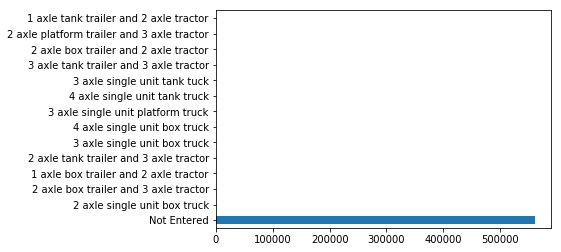


**************************************************

DIRECTION OF TRAVEL



East              115557
North             111534
Northeast          11778
Northwest          11348
Not Applicable     16760
                   ...  
South             109261
Southeast          11160
Southwest          11132
Unknown            50117
West              111956
Name: Direction of Travel, Length: 11, dtype: int64

None


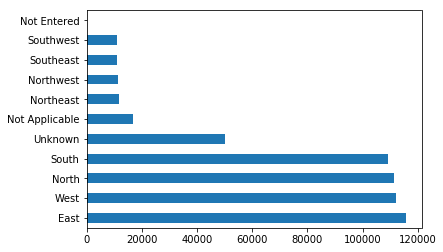


**************************************************

FUEL TYPE



Compressed Natural Gas       413
Diesel                     16569
Electric                     343
Flex                         128
Gas                       424310
None                         636
Not Entered               117856
Other                         31
Propane                       14
Unknown                      307
Name: Fuel Type, dtype: int64

None


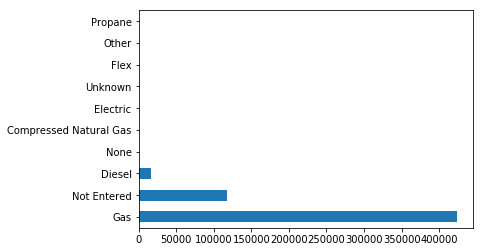


**************************************************

VEHICLE YEAR



1900.0        5
1901.0        2
1906.0        1
1911.0        1
1914.0        1
          ...  
2013.0    34387
2014.0    40645
2015.0    48556
2016.0    32393
2017.0     2493
Name: Vehicle Year, Length: 89, dtype: int64

None


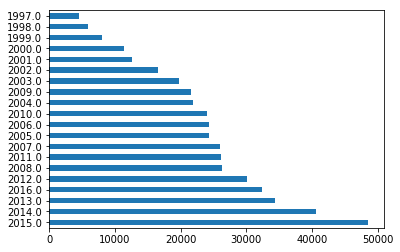


**************************************************

STATE OF REGISTRATION



AB     13
AK     26
AL    167
AR     70
AZ    452
     ... 
WV     83
WY     12
YT     23
ZS      7
pa      1
Name: State of Registration, Length: 75, dtype: int64

None


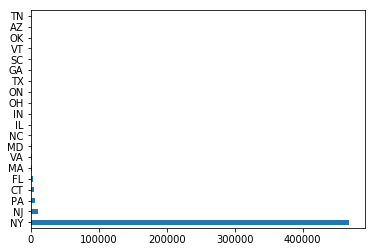


**************************************************

NUMBER OF OCCUPANTS



0.0       27285
1.0      358524
2.0       84355
3.0       23883
4.0       10128
          ...  
90.0          2
95.0          1
100.0         3
231.0         1
881.0         1
Name: Number of Occupants, Length: 67, dtype: int64

None


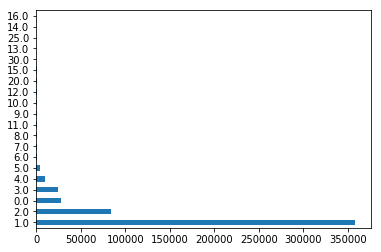


**************************************************

ENGINE CYLINDERS



0.0        788
1.0        485
2.0       2316
3.0        408
4.0     212481
         ...  
7.0          5
8.0      55401
9.0          5
10.0       916
12.0        46
Name: Engine Cylinders, Length: 12, dtype: int64

None


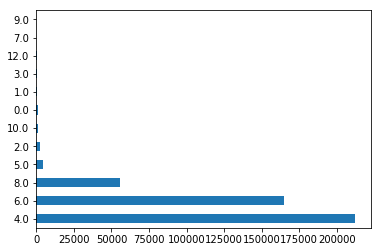


**************************************************

VEHICLE MAKE



A          1
AAA        1
ABTR       8
ACME       1
ACUR     322
        ... 
YORK       1
ZHEJ       1
ZHNG       1
ZHONG      1
ZNEN       3
Name: Vehicle Make, Length: 1178, dtype: int64

None


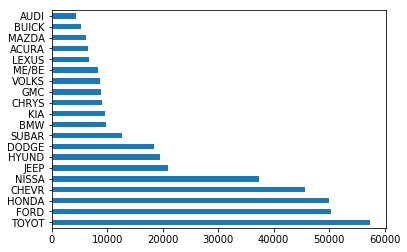


**************************************************

CONTRIBUTING FACTOR 1



ENVMT       36941
HUMAN      515690
VEHICLE      7971
Name: Contributing Factor 1, dtype: int64

None


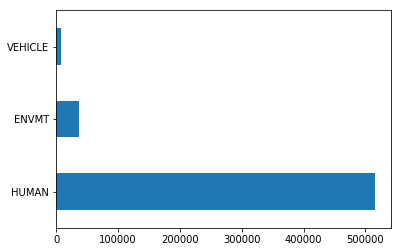


**************************************************

CONTRIBUTING FACTOR 1 DESCRIPTION



Accelerator Defective                 216
Aggressive Driving/Road Rage          921
Alcohol Involvement                  6586
Animal's Action                     22058
Backing Unsafely                     9825
                                    ...  
Unsafe Lane Changing                 8809
Unsafe Speed                        18640
Using On Board Navigation Device       45
View Obstructed/Limited              3012
Windshield Inadequate                  13
Name: Contributing Factor 1 Description, Length: 57, dtype: int64

None


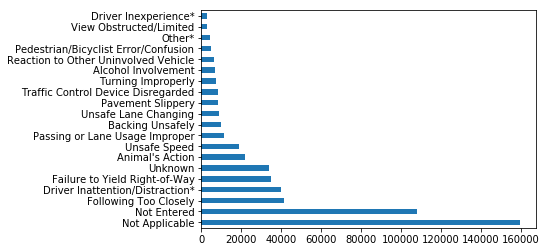


**************************************************

CONTRIBUTING FACTOR 2



ENVMT       16314
HUMAN      541328
VEHICLE      2960
Name: Contributing Factor 2, dtype: int64

None


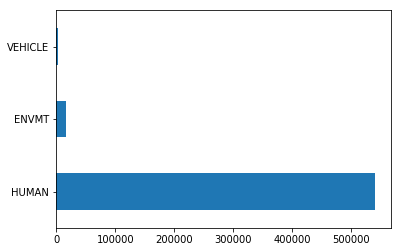


**************************************************

CONTRIBUTING FACTOR 2 DESCRIPTION



Accelerator Defective                 62
Aggressive Driving/Road Rage         752
Alcohol Involvement                 1198
Animal's Action                     1016
Backing Unsafely                    1143
                                    ... 
Unsafe Lane Changing                3786
Unsafe Speed                        8794
Using On Board Navigation Device      55
View Obstructed/Limited             2436
Windshield Inadequate                 17
Name: Contributing Factor 2 Description, Length: 57, dtype: int64

None


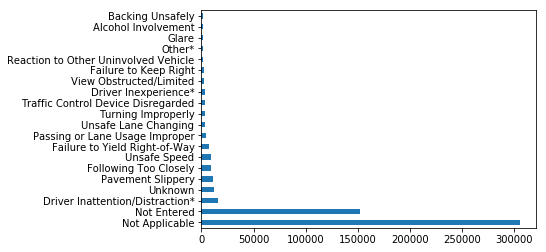


**************************************************

EVENT TYPE



Animal, Collision With                             78
Barrier, Collision With Fixed Object              530
Bicyclist, Collision With                         765
Bridge Structure, Collision With Fixed Object     118
Building/Wall, Collision With Fixed Object        982
                                                 ... 
Sign Post, Collision With Fixed Object           1490
Snow Embankment, Collision With Fixed Object      279
Submersion, Non-Collision                          52
Tree, Collision With Fixed Object                3145
Unknown                                          2266
Name: Event Type, Length: 35, dtype: int64

None


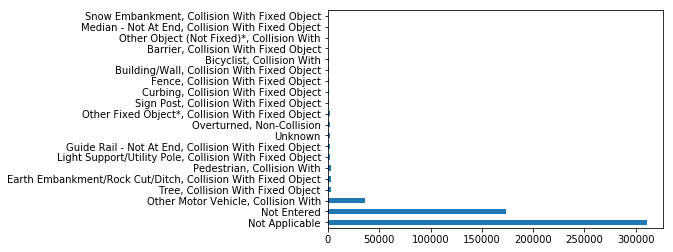


**************************************************

PARTIAL VIN



0                    9
0013T623508          1
00867S100958         1
023D9J564            1
04C96771052519137    1
                    ..
ye2cc17b572047238    1
ye2cc17b962047175    1
ye2cc19b992046903    1
ye2tc19b0c2044772    1
ye2yc22b4e2041186    2
Name: Partial VIN, Length: 446982, dtype: int64

None


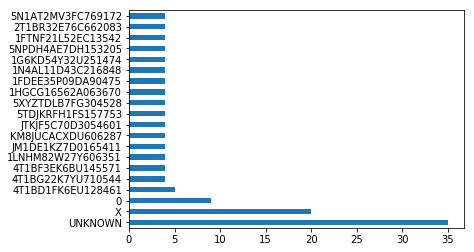


**************************************************



In [6]:
for i in veh.columns:
    print(i.upper())
    print()
    print(view(veh[i].value_counts().sort_index(),5))
    veh[i].value_counts().head(20).plot(kind='barh')
    plt.show()
    print()
    print('*'*50)
    print()

## Preprocessing

### Renaming Columns

In [7]:
# Renaming the columns for easier handling

veh.columns = ['year', 
               'veh_id', 
               'veh_type', 
               'registration_class', 
               'prior_action', 
               'axles', 
               'direction_travel', 
               'fuel', 
               'veh_year', 
               'registration_state', 
               'num_occupants', 
               'engine_cylinders', 
               'veh_make', 
               'contributor_1', 
               'contributor_description_1', 
               'contributor_2', 
               'contributor_description_2', 
               'event_type', 
               'vin']

### Dropping Unnecessary Columns

In [8]:
veh = veh.drop(columns=['year',
                       'registration_class',
                       'axles',
                       'fuel',
                       'registration_state',
                       'contributor_description_1',
                       'contributor_2',
                       'contributor_description_2',
                       'event_type',
                       'vin'])

### Checking Null Values

There are quite a few in several of the columns. I am planning to trim down several columns, so I will see how that affects the null value count.

In [9]:
# Null values count

veh.isna().sum()

veh_id                   0
veh_type                 0
prior_action             0
direction_travel         0
veh_year             87525
num_occupants        49951
engine_cylinders    118177
veh_make             87006
contributor_1            5
dtype: int64

### Fixing Each Column

#### Vehicle Year

The vehicle involved in the crash is one of the main components I want to consider in my analysis. I will only look at cars that were produced in the year 2000 onward.

In [10]:
veh = veh[veh.veh_year >= 2000]

What I really care about is the age of the car. Note that new car models are released as the following year. So I will convert the vehicle year column to vehicle age by subtracting from the year 2016, and add 1 to each difference to get the accurate age of the car.

In [11]:
veh["veh_age"] = 2016 - veh.veh_year.astype(int) + 1

In [12]:
# No longer need this column

veh = veh.drop(columns=['veh_year'])

#### Vehicle Make

In [13]:
veh = veh[~veh.veh_make.isna()]

In [14]:
view(veh.veh_make.value_counts(),5)

TOYOT    53703
FORD     46642
HONDA    46573
CHEVR    42822
NISSA    35464
         ...  
NEOP         1
PINE         1
AL/DE        1
START        1
DAIN         1
Name: veh_make, Length: 1014, dtype: int64

In [15]:
def rename_maker_starts(original, rename):
    veh.loc[veh.veh_make.str.startswith(original), 'veh_make'] = str(rename)
    return

In [16]:
def rename_maker(original, rename):
    veh.loc[veh.veh_make.str.contains(original, case=False), 'veh_make'] = str(rename)
    return

In [17]:
rename_maker_starts("FR","freightliner")
rename_maker_starts("LEX","lexus")
rename_maker_starts("SUZ","suzuki")

In [18]:
rename_maker("acur","acura")
rename_maker("aud","audi")
rename_maker("bmw","bmw")
rename_maker("bui","buick")
rename_maker("cadi","cadillac")
rename_maker("chev","chevrolet")
rename_maker("chr","chrysler")
rename_maker("dod","dodge")
rename_maker("ford","ford")
rename_maker("gmc","gmc")
rename_maker("hond","honda")
rename_maker("ha/","harley")
rename_maker("hyu","hyundai")
rename_maker("inf","infiniti")
rename_maker("int","international")
rename_maker("isu","isuzu")
rename_maker("jeep","jeep")
rename_maker("kia","kia")
rename_maker("la/","landrover")
rename_maker("linc","lincoln")
rename_maker("mac","mack")
rename_maker("maz","mazda")
rename_maker("mercu","mercury")
rename_maker("merc|merz|me/","mercedes")
rename_maker("mit","mitsubishi")
rename_maker("niss","nissan")
rename_maker("pon","pontiac")
rename_maker("por","porsche")
rename_maker("ram","ram")
rename_maker("sat","saturn")
rename_maker("suba","subaru")
rename_maker("toy","toyota")
rename_maker("volk","volkswagen")
rename_maker("volv","volvo")

In [19]:
view(veh.veh_make.value_counts(),5)

toyota       56409
honda        48940
ford         46651
chevrolet    45514
nissan       37504
             ...  
PROS             1
WABA             1
AMER             1
TUSCA            1
DAIN             1
Name: veh_make, Length: 902, dtype: int64

In [20]:
# Keeping makers that have at least 1000 vehicles in this dataset

makers_keep = list(veh.veh_make.value_counts()[:34].index)
print(makers_keep)

['toyota', 'honda', 'ford', 'chevrolet', 'nissan', 'hyundai', 'jeep', 'dodge', 'subaru', 'mercedes', 'kia', 'bmw', 'chrysler', 'volkswagen', 'gmc', 'lexus', 'acura', 'mazda', 'buick', 'infiniti', 'audi', 'pontiac', 'lincoln', 'mitsubishi', 'cadillac', 'volvo', 'saturn', 'freightliner', 'ram', 'suzuki', 'international', 'mack', 'landrover', 'harley']


In [21]:
veh = veh[veh.veh_make.isin(makers_keep)]

#### Vehicle Type

In [22]:
view(veh.veh_type.value_counts(),5)

4 DOOR SEDAN              193806
SUBURBAN                  166017
PICKUP TRUCK               29767
2 DOOR SEDAN               15706
VAN TRUCK                   7672
                           ...  
SNOW TRAVELER                  1
BICYCLIST                      1
MOBILE CAR CRUSHER             1
HEARSE - INVALID               1
CONSTRUCTION EQUIPMENT         1
Name: veh_type, Length: 55, dtype: int64

In [23]:
drop_types = ["OTHER VEHICLE", 
              "UNKNOWN VEHICLE", 
              "CUSTOM", 
              "Not Entered", 
              "UNKNOWN CAR", 
              "PEDESTRIAN", 
              "WELL DRILLER", 
              "FEED PROCESSING MACHINE", 
              "SNOW TRAVELER", 
              "CONSTRUCTION EQUIPMENT", 
              "BICYCLIST"]

In [24]:
# Dropping the above types as they don't fit into the main vehicle type categories

veh = veh[~veh.veh_type.isin(drop_types)]

In [25]:
def rename_type(original, rename):
    veh.loc[veh.veh_type.str.contains(original), 'veh_type'] = str(rename)
    return

In [26]:
bus_type = ["BUS \(OMNIBUS\)", "LIMOUSINE \(OMNIBUS\)"]

motorcycle_type = ["MOTORCYCLE", "MOPED"]

sedan_type = ["CONVERTIBLE", "4 DOOR SEDAN", "2 DOOR SEDAN", "TAXI", "POLICE VEHICLE", "SEDAN"]

suburban_type = ["SUBURBAN", "AMBULANCE", "HEARSE (AMBULANCE)", "HEARSE - INVALID"]

In [27]:
for t in bus_type:
    rename_type(t,"bus")

for t in motorcycle_type:
    rename_type(t,"motorcycle")

for t in sedan_type:
    rename_type(t,"sedan")

for t in suburban_type:
    rename_type(t,"suburban")

In [28]:
veh.veh_type = veh.veh_type.where(veh.veh_type.str.contains("bus|motorcycle|sedan|suburban"), "truck")

In [29]:
veh.veh_type.value_counts()

sedan         215639
suburban      166217
truck          44917
motorcycle      2146
bus              914
Name: veh_type, dtype: int64

#### Number of Occupants

In [30]:
veh.num_occupants.isna().sum()

8809

I will assume that vehicles that didn't specify a number of occupants had only the driver.

In [31]:
veh.num_occupants.fillna(1, inplace=True)

#### Engine Cylinders

In [32]:
veh.engine_cylinders.isna().sum()

26366

There are many null values in the engine cylinders column, encapsulating various vehicle types. There are also many values of 0 in the engine cylinders column, which can't be accurate. I will assign the number of cylinders that is typical of each car type.

In [33]:
veh.loc[veh.veh_type.str.contains("motorcycle") & veh.engine_cylinders.isna(), 'engine_cylinders'] = 1
veh.loc[veh.veh_type.str.contains("motorcycle") & (veh.engine_cylinders == 0), 'engine_cylinders'] = 1

In [34]:
veh.loc[veh.veh_type.str.contains("sedan") & veh.engine_cylinders.isna(), 'engine_cylinders'] = 4
veh.loc[veh.veh_type.str.contains("sedan") & (veh.engine_cylinders == 0), 'engine_cylinders'] = 4

In [35]:
veh.loc[veh.veh_type.str.contains("bus|suburban|truck") & veh.engine_cylinders.isna(), 'engine_cylinders'] = 4
veh.loc[veh.veh_type.str.contains("bus|suburban|truck") & (veh.engine_cylinders == 0), 'engine_cylinders'] = 6

#### Direction of Travel

In [36]:
veh.direction_travel.value_counts()

East              93829
West              90984
North             90070
South             88871
Unknown           28473
Northeast          9594
Northwest          9340
Southwest          9123
Southeast          9121
Not Applicable      428
Name: direction_travel, dtype: int64

In [37]:
veh.loc[veh.direction_travel.str.contains("Not Applicable|Unknown"), 'direction_travel'] = "still"

In [38]:
veh.direction_travel = veh.direction_travel.str.lower()

#### Action Prior to Accident

In [39]:
veh.prior_action.value_counts()

Going Straight Ahead          211980
Stopped in Traffic             39720
Making Left Turn               35385
Slowing or Stopping            34696
Parked                         29834
Unknown                        18139
Making Right Turn              13904
Backing                        12530
Changing Lanes                  9755
Starting in Traffic             6798
Merging                         3328
Overtaking/Passing              2718
Starting from Parking           2680
Other                           2325
Making U Turn                   2139
Entering Parked Position        1843
Avoiding Object in Roadway      1412
Not Applicable                   211
Making Right Turn on Red         205
Police Pursuit                   142
Making Left Turn on Red           89
Name: prior_action, dtype: int64

In [40]:
view(veh[veh.prior_action.str.contains("Unknown|Other|Not Applicable")],3)

,veh_id,veh_type,prior_action,direction_travel,num_occupants,engine_cylinders,veh_make,contributor_1,veh_age
45,13364777,sedan,Unknown,south,1.0,4.0,nissan,HUMAN,11
602,13369470,suburban,Other,west,2.0,4.0,toyota,HUMAN,7
699,13369814,sedan,Not Applicable,west,1.0,4.0,kia,HUMAN,2
...,...,...,...,...,...,...,...,...,...
560567,14838368,sedan,Unknown,still,1.0,4.0,kia,HUMAN,2
560578,14845809,truck,Unknown,still,2.0,8.0,dodge,HUMAN,7
560601,14866399,sedan,Unknown,still,2.0,5.0,volkswagen,HUMAN,3


In [41]:
veh.loc[veh.prior_action.str.contains("Unknown|Other|Not Applicable"), 'prior_action'] = "Unknown"

In [42]:
veh.prior_action = veh.prior_action.str.lower() \
    .str.replace(" ","") \
    .str.replace("overtaking/passing","passing") \
    .str.replace("making","")

#### Contributor

In [43]:
veh.rename(columns={'contributor_1':'cause'}, inplace=True)

In [44]:
veh.cause = veh.cause.str.lower()

## Checking

#### Preview

In [45]:
view(veh,3)

,veh_id,veh_type,prior_action,direction_travel,num_occupants,engine_cylinders,veh_make,cause,veh_age
0,13364180,suburban,goingstraightahead,east,2.0,4.0,nissan,human,2
1,13364181,sedan,merging,south,1.0,4.0,hyundai,human,10
2,13364182,sedan,goingstraightahead,south,1.0,4.0,honda,human,8
...,...,...,...,...,...,...,...,...,...
560602,14867087,sedan,parked,still,0.0,6.0,chrysler,human,10
560603,14867164,sedan,goingstraightahead,south,1.0,4.0,honda,human,9
560604,14867165,suburban,stoppedintraffic,south,2.0,4.0,ford,human,3


#### Info

In [46]:
veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429833 entries, 0 to 560604
Data columns (total 9 columns):
veh_id              429833 non-null int64
veh_type            429833 non-null object
prior_action        429833 non-null object
direction_travel    429833 non-null object
num_occupants       429833 non-null float64
engine_cylinders    429833 non-null float64
veh_make            429833 non-null object
cause               429833 non-null object
veh_age             429833 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 32.8+ MB


#### Describe

In [47]:
veh.describe()

,veh_id,num_occupants,engine_cylinders,veh_age
count,4.298330e+05,429833.000000,429833.000000,429833.000000
mean,1.387070e+07,1.322079,5.155874,7.429011
std,2.676558e+05,1.688443,1.394844,4.705934
min,1.336418e+07,0.000000,1.000000,0.000000
25%,1.364957e+07,1.000000,4.000000,3.000000
50%,1.387274e+07,1.000000,4.000000,7.000000
75%,1.409708e+07,1.000000,6.000000,11.000000
max,1.486716e+07,881.000000,12.000000,17.000000


#### Checking for Null Values

In [48]:
# Null values count

veh.isna().sum()

veh_id              0
veh_type            0
prior_action        0
direction_travel    0
num_occupants       0
engine_cylinders    0
veh_make            0
cause               0
veh_age             0
dtype: int64

#### Number of Unique Values

In [49]:
[f'{c}: {veh[c].nunique()}' for c in veh.columns]

['veh_id: 429833',
 'veh_type: 5',
 'prior_action: 19',
 'direction_travel: 9',
 'num_occupants: 43',
 'engine_cylinders: 11',
 'veh_make: 34',
 'cause: 3',
 'veh_age: 18']

#### Column Values

VEH_ID



13364180    1
13364181    1
13364182    1
13364283    1
13364292    1
           ..
14866236    1
14866399    1
14867087    1
14867164    1
14867165    1
Name: veh_id, Length: 429833, dtype: int64

None


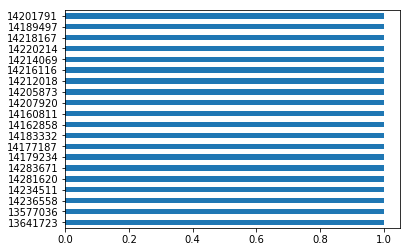


**************************************************

VEH_TYPE



bus              914
motorcycle      2146
sedan         215639
suburban      166217
truck          44917
Name: veh_type, dtype: int64

None


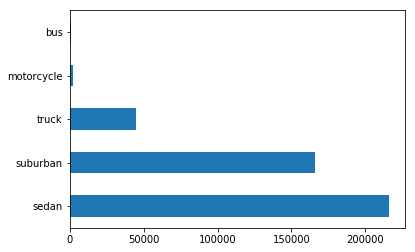


**************************************************

PRIOR_ACTION



avoidingobjectinroadway      1412
backing                     12530
changinglanes                9755
enteringparkedposition       1843
goingstraightahead         211980
                            ...  
startingfromparking          2680
startingintraffic            6798
stoppedintraffic            39720
unknown                     20675
uturn                        2139
Name: prior_action, Length: 19, dtype: int64

None


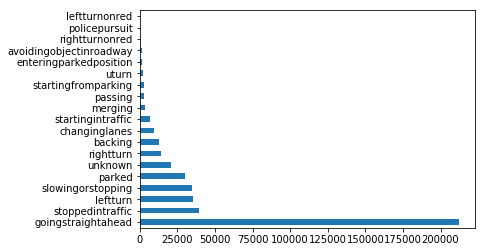


**************************************************

DIRECTION_TRAVEL



east         93829
north        90070
northeast     9594
northwest     9340
south        88871
southeast     9121
southwest     9123
still        28901
west         90984
Name: direction_travel, dtype: int64

None


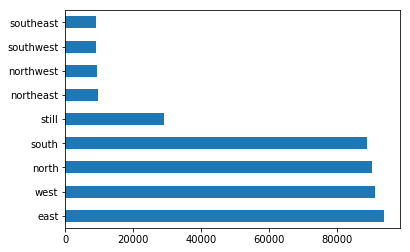


**************************************************

NUM_OCCUPANTS



0.0       22364
1.0      303827
2.0       70506
3.0       20038
4.0        8472
          ...  
57.0          1
95.0          1
100.0         2
231.0         1
881.0         1
Name: num_occupants, Length: 43, dtype: int64

None


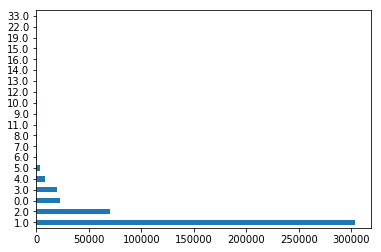


**************************************************

ENGINE_CYLINDERS



1.0        263
2.0       1334
3.0        150
4.0     225674
5.0       4244
         ...  
7.0          4
8.0      48319
9.0          4
10.0       776
12.0        17
Name: engine_cylinders, Length: 11, dtype: int64

None


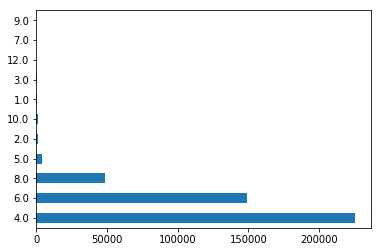


**************************************************

VEH_MAKE



acura          6484
audi           4270
bmw            9424
buick          4959
cadillac       3733
              ...  
subaru        13039
suzuki         1915
toyota        56390
volkswagen     9144
volvo          3234
Name: veh_make, Length: 34, dtype: int64

None


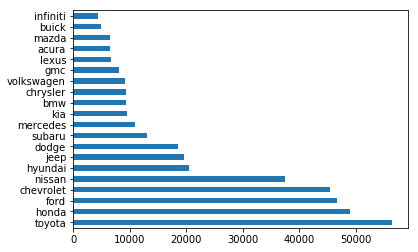


**************************************************

CAUSE



envmt       33307
human      390835
vehicle      5691
Name: cause, dtype: int64

None


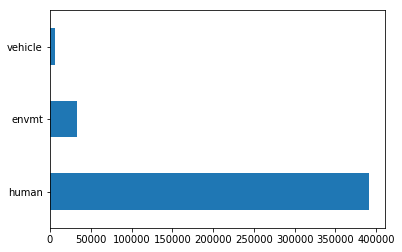


**************************************************

VEH_AGE



0      2292
1     31305
2     47074
3     39556
4     33363
      ...  
13    21240
14    19041
15    16073
16    12107
17    10856
Name: veh_age, Length: 18, dtype: int64

None


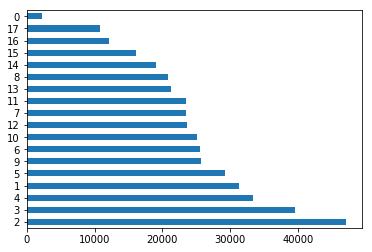


**************************************************



In [50]:
for i in veh.columns:
    print(i.upper())
    print()
    print(view(veh[i].value_counts().sort_index(),5))
    veh[i].value_counts().head(20).plot(kind='barh')
    plt.show()
    print()
    print('*'*50)
    print()

## Exporting Dataframe

In [51]:
veh.to_csv(r'vehicles.csv')